In [1]:
import numpy as np
import matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import datetime
from tqdm import tqdm

mpl.rcParams['legend.frameon'] = False
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['figure.dpi'] = 300
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


def utkarshGrid():
    plt.minorticks_on()
    plt.grid(color='grey',
             which='minor',
             linestyle=":",
             linewidth='0.1',
             )
    plt.grid(color='black',
             which='major',
             linestyle=":",
             linewidth='0.1',
             )

In [2]:
import sys
# !{sys.executable} -m pip install GPy
# !{sys.executable} -m pip install --upgrade pip
import GPy

In [3]:
from collections import defaultdict
from pathlib import Path

path = "/Users/utkarsh/PycharmProjects/SURP2021/bns_m3_3comp"

resd = defaultdict(list)
for file in Path(path).iterdir():
    with open(file, "r") as file_open:
        resd["file_name"].append(file.name)
#         resd["text"].append(pd.read_csv(file_open))
raw_data = pd.DataFrame(resd)
raw_data = raw_data[raw_data.file_name != ".DS_Store"]
raw_data

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(raw_data)

,file_name
0,nph1.0e+06_mejdyn0.001_mejwind0.130_phi45.txt
1,nph1.0e+06_mejdyn0.010_mejwind0.050_phi15.txt
2,nph1.0e+06_mejdyn0.001_mejwind0.010_phi75.txt
3,nph1.0e+06_mejdyn0.005_mejwind0.090_phi75.txt
4,nph1.0e+06_mejdyn0.020_mejwind0.110_phi60.txt
...,...
192,nph1.0e+06_mejdyn0.005_mejwind0.110_phi0.txt
193,nph1.0e+06_mejdyn0.001_mejwind0.090_phi0.txt
194,nph1.0e+06_mejdyn0.020_mejwind0.070_phi0.txt
195,nph1.0e+06_mejdyn0.010_mejwind0.050_phi30.txt


In [4]:
split_series = raw_data.file_name.apply(lambda x: x.split('_'))
reference_data = split_series.apply(pd.Series)
reference_data["file_name"] = raw_data.file_name
reference_data.columns = ["nph", "mejdyn", "mejwind", "phi", "filename"]
reference_data["mejdyn"] = reference_data["mejdyn"].str.extract("(\d*\.?\d+)", expand=True)
reference_data["mejwind"] = reference_data["mejwind"].str.extract("(\d*\.?\d+)", expand=True)
reference_data["phi"] = reference_data["phi"].str.extract("(\d*\.?\d+)", expand=True)
reference_data["nph"] = reference_data["nph"].apply(lambda x: float(x[3:]))
reference_data[["mejdyn", "mejwind", "phi"]] = reference_data[["mejdyn", "mejwind", "phi"]].apply(pd.to_numeric)
reference_data.sort_values(by=['phi'])
reference_data

,nph,mejdyn,mejwind,phi,filename
0,1000000.0,0.001,0.13,45,nph1.0e+06_mejdyn0.001_mejwind0.130_phi45.txt
1,1000000.0,0.010,0.05,15,nph1.0e+06_mejdyn0.010_mejwind0.050_phi15.txt
2,1000000.0,0.001,0.01,75,nph1.0e+06_mejdyn0.001_mejwind0.010_phi75.txt
3,1000000.0,0.005,0.09,75,nph1.0e+06_mejdyn0.005_mejwind0.090_phi75.txt
4,1000000.0,0.020,0.11,60,nph1.0e+06_mejdyn0.020_mejwind0.110_phi60.txt
...,...,...,...,...,...
192,1000000.0,0.005,0.11,0,nph1.0e+06_mejdyn0.005_mejwind0.110_phi0.txt
193,1000000.0,0.001,0.09,0,nph1.0e+06_mejdyn0.001_mejwind0.090_phi0.txt
194,1000000.0,0.020,0.07,0,nph1.0e+06_mejdyn0.020_mejwind0.070_phi0.txt
195,1000000.0,0.010,0.05,30,nph1.0e+06_mejdyn0.010_mejwind0.050_phi30.txt


In [5]:
single_file = path + "/"+  raw_data.file_name[0]
# print(single_file)
simple_data = pd.read_csv(single_file, header = None, names = ["data"])
simple_data

,data
0,11
1,500
2,100 0.0 20.0
3,1.000e+02 0.0000e+00 0.0000e+00 0.0000e+00 0.0...
4,3.000e+02 0.0000e+00 0.0000e+00 0.0000e+00 0.0...
...,...
5498,9.910e+04 0.0000e+00 0.0000e+00 0.0000e+00 0.0...
5499,9.930e+04 0.0000e+00 0.0000e+00 0.0000e+00 0.0...
5500,9.950e+04 0.0000e+00 0.0000e+00 0.0000e+00 0.0...
5501,9.970e+04 0.0000e+00 0.0000e+00 0.0000e+00 0.0...


In [6]:
Nobs = float(simple_data.data.iloc[0])
Nwave = float(simple_data.data.iloc[1])
Ntime = list(map(float, simple_data.data.iloc[2].split())) # (number of time bins), t_i (days), t_f (days)
data = simple_data.iloc[3:].reset_index(drop = True)
data["data"] = data["data"].apply(lambda x: list(map(float, x.split())))
print(data.columns)
print(Nobs, Nwave, Ntime)
data

Index(['data'], dtype='object')
11.0 500.0 [100.0, 0.0, 20.0]


,data
0,"[100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
1,"[300.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,"[500.0, 4.9554e-06, 3.7469e-07, 0.0, 1.0496e-3..."
3,"[700.0, 6.1511e-05, 1.0477e-05, 2.4387e-07, 2...."
4,"[900.0, 0.00015529, 4.6095e-05, 1.5146e-06, 2...."
...,...
5495,"[99100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
5496,"[99300.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
5497,"[99500.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
5498,"[99700.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."


In [7]:
data.loc[:, 'wavelength'] = data.data.map(lambda x: x[0])
data["data"] = data["data"].apply(lambda x: x[1:])

In [8]:
data.index.name = "iwave"
data.head(5) # SPLIT THIS INTO EACH OBS EVENTUALLY

,data,wavelength
iwave,,
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",100.0
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",300.0
2,"[4.9554e-06, 3.7469e-07, 0.0, 1.0496e-303, 6.1...",500.0
3,"[6.1511e-05, 1.0477e-05, 2.4387e-07, 2.1385e-2...",700.0
4,"[0.00015529, 4.6095e-05, 1.5146e-06, 2.4401e-0...",900.0


Int64Index([45, 545, 1045, 1545, 2045, 2545, 3045, 3545, 4045, 4545, 5045], dtype='int64', name='iwave')


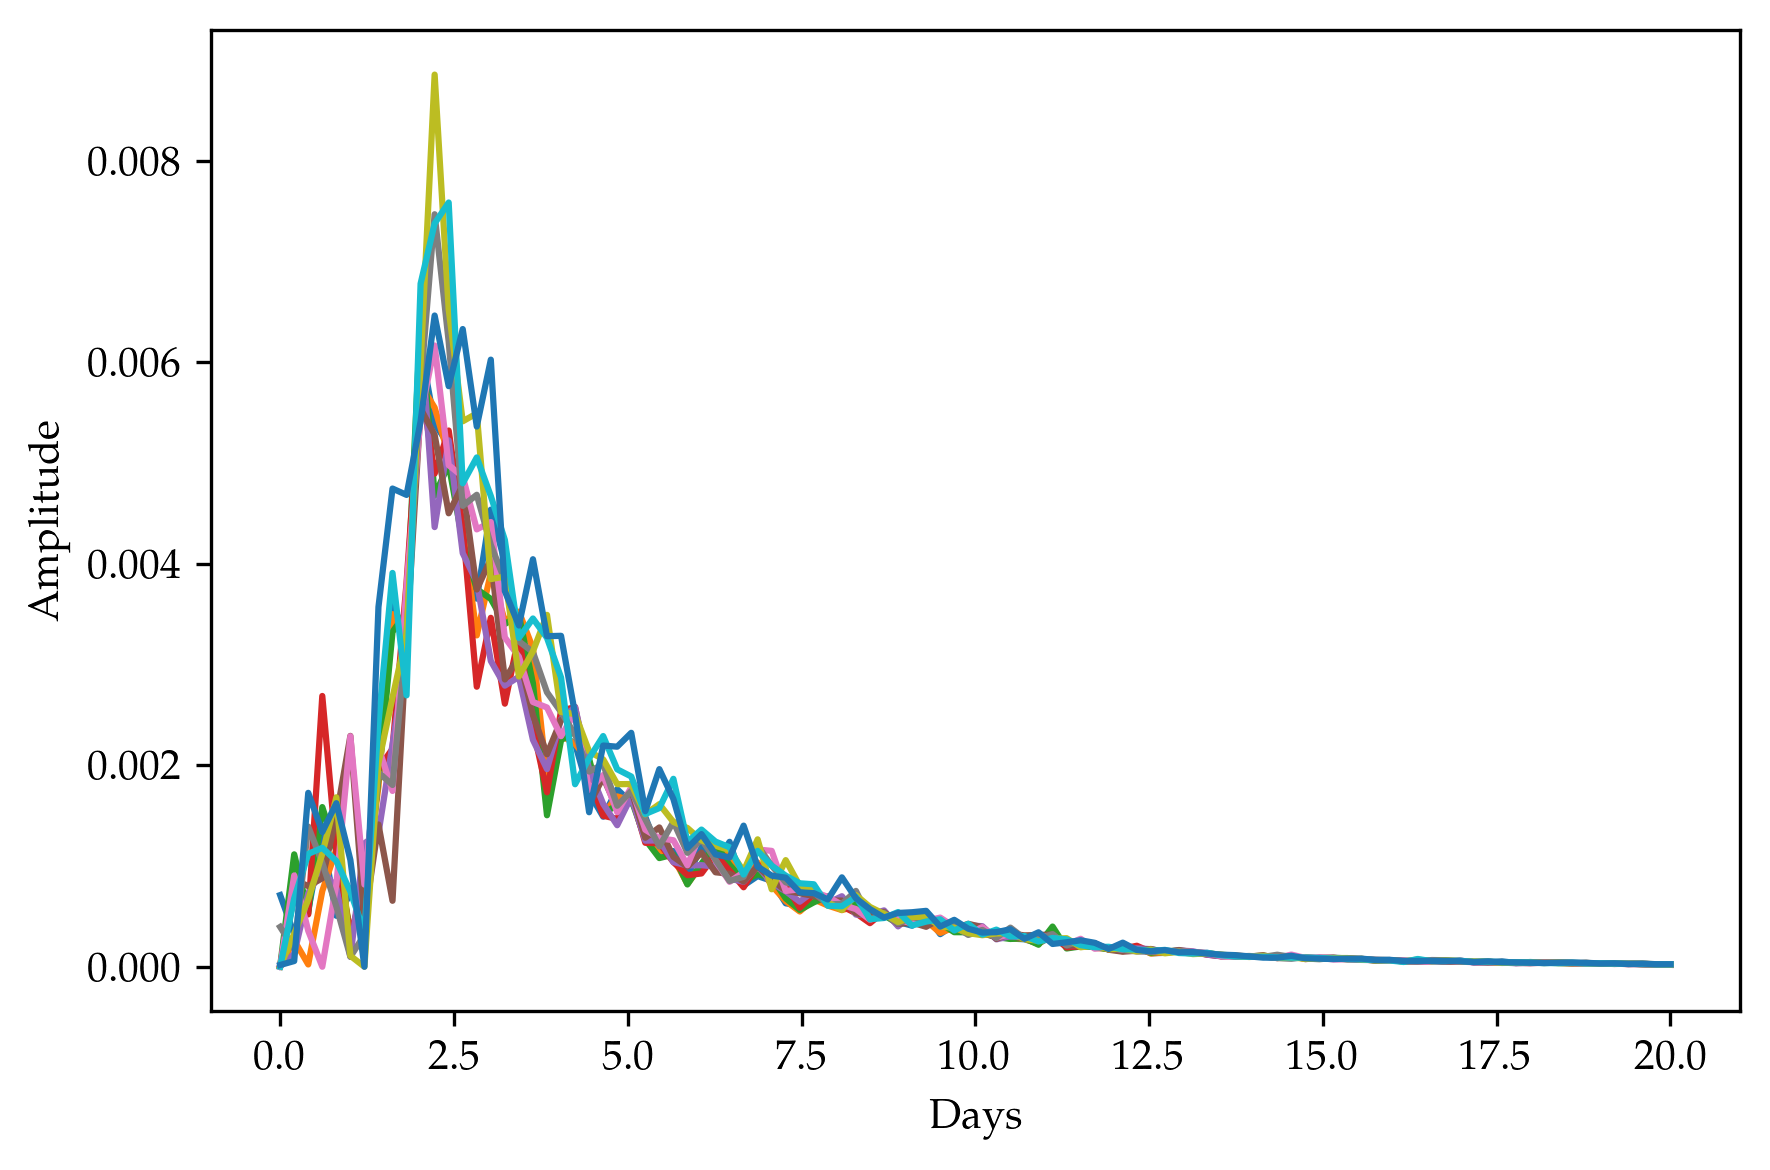

In [9]:
time_arr = np.linspace(int(Ntime[1]), int(Ntime[2]), int(Ntime[0]), endpoint = True)

kBand = 2100 * 10
zBand = 910 * 10 #convert to angstrom
wv_ind = data.index[data.wavelength == zBand] # NOW YOU KNOW iobs, 11 as expected
print(wv_ind)
plt.figure()
for i in range(len(wv_ind)):
    plt.plot(time_arr, data.data.iloc[wv_ind[i]])
plt.xlabel("Days")
plt.ylabel("Amplitude")
# plt.xlim(0, 1.5)
plt.show()